In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [3]:
#Carga de dataset
data = pd.read_csv('Bank_registries.csv', header=0, sep=',')

In [4]:
#mostramos el dataset
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [5]:
# observamos si nos faltan datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Eliminar columnas irrelevantes para la regresion
columna_eliminar = ['RowNumber', 'CustomerId', 'Surname']
data.drop(columna_eliminar, axis=1, inplace=True)

# Muestra el DataFrame resultante
print(data)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [9]:
#procesamiento de frases
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [10]:
print(data)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

In [11]:
X = data.iloc[:, :10]
y = data.iloc[:, 10]
m = y.size

In [12]:
print(X)
print('*'*15)
print(y)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [13]:

# Division de dataset en entrenamiento y prueba
train_dataB, test_dataB = train_test_split(data, test_size=0.2, random_state=42)

In [14]:
print("Datos entrenamiento> ")
print(train_dataB)

Datos entrenamiento> 
      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9254          686          0       1   32       6       0.00              2   
1561          632          1       1   42       4  119624.60              2   
1670          559          2       1   24       3  114739.92              1   
6087          561          0       0   27       9  135637.00              1   
6669          517          0       1   56       9  142147.32              1   
...           ...        ...     ...  ...     ...        ...            ...   
5734          768          0       1   54       8   69712.74              1   
5191          682          0       0   58       1       0.00              1   
5390          735          0       0   38       1       0.00              3   
860           667          0       1   43       8  190227.46              1   
7270          697          1       1   51       1  147910.30              1   

      HasCrCard  IsActiveMemb

In [15]:
print("Datos de prueba> ")
print(test_dataB)

Datos de prueba> 
      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
6252          596          1       1   32       3   96709.07              2   
4684          623          0       1   43       1       0.00              2   
1731          601          2       0   44       4       0.00              2   
4742          506          1       1   59       8  119152.10              2   
4521          560          2       0   27       7  124995.98              1   
...           ...        ...     ...  ...     ...        ...            ...   
6412          602          1       0   53       5   98268.84              1   
8285          609          0       1   25      10       0.00              1   
7853          730          0       0   47       7       0.00              1   
1095          692          0       1   29       4       0.00              1   
6929          628          1       1   39       1  115341.19              1   

      HasCrCard  IsActiveMember  

In [16]:
train_dataB.to_csv("train.csv", index=False)

In [17]:
test_dataB.to_csv("test.csv", index=False)

In [18]:
#Carga de dataset
data = pd.read_csv('train.csv')

In [19]:
X = data.iloc[:, :10]
y = data.iloc[:, 10]
m = y.size

In [20]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [21]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             686          0       1   32       6       0.00              2   
1             632          1       1   42       4  119624.60              2   
2             559          2       1   24       3  114739.92              1   
3             561          0       0   27       9  135637.00              1   
4             517          0       1   56       9  142147.32              1   
...           ...        ...     ...  ...     ...        ...            ...   
7995          768          0       1   54       8   69712.74              1   
7996          682          0       0   58       1       0.00              1   
7997          735          0       0   38       1       0.00              3   
7998          667          0       1   43       8  190227.46              1   
7999          697          1       1   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [22]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [23]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [24]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [25]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [26]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [27]:
#Carga de dataset
data = pd.read_csv('test.csv')
print(data)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             596          1       1   32       3   96709.07              2   
1             623          0       1   43       1       0.00              2   
2             601          2       0   44       4       0.00              2   
3             506          1       1   59       8  119152.10              2   
4             560          2       0   27       7  124995.98              1   
...           ...        ...     ...  ...     ...        ...            ...   
1995          602          1       0   53       5   98268.84              1   
1996          609          0       1   25      10       0.00              1   
1997          730          0       0   47       7       0.00              1   
1998          692          0       1   29       4       0.00              1   
1999          628          1       1   39       1  115341.19              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

theta calculado por el descenso por el gradiente: [-1.5995349  -0.06655698  0.08843822 -0.2662551   0.74426625 -0.0393263
  0.29734077 -0.02890221 -0.00334069 -0.52499175  0.0191943 ]
El resaultado entre falso o verdadero es (usando el descenso por el gradiente):1


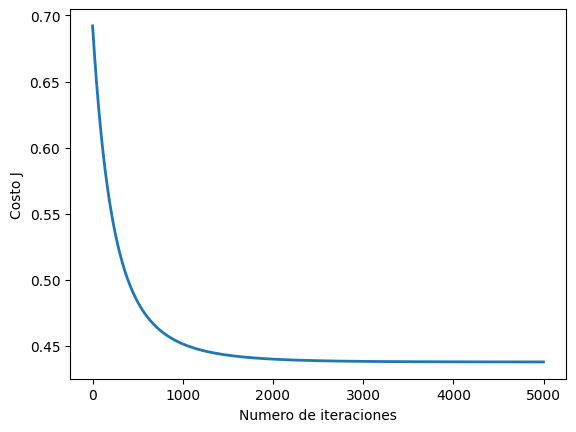

In [36]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 619, 0, 0, 42, 2, 0, 1, 1, 1, 101348.88]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('El resaultado entre falso o verdadero es (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [37]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h+epsilon)) - (1 - y).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [38]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 0.2945      0.01184189 -0.01596437  0.0430243  -0.11442085  0.00539495
 -0.04784872  0.02061102  0.00261487  0.06326082 -0.00439983]
Gradiente en theta inicial (zeros):
	[0.2945, 0.0118, -0.0160, 0.0430, -0.1144, 0.0054, -0.0478, 0.0206, 0.0026, 0.0633]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [39]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([0.2963, 0.01091188, -0.01447597, 0.04289774, -0.11491341, 0.00563872, -0.04773889, 0.01925938, 0.00287472, 0.06288042, -0.00487199])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))

[ 0.2963      0.01091188 -0.01447597  0.04289774 -0.11491341  0.00563872
 -0.04773889  0.01925938  0.00287472  0.06288042 -0.00487199]
Costo en theta prueba: 0.816
Gradiente en theta prueba:
	[0.368, 0.015, -0.021, 0.054, -0.142, 0.007, -0.062, 0.030, 0.004, 0.077]


In [40]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))

Costo con un valor de theta encontrado por optimize.minimize: 0.438
theta:
	[-1.616, -0.067, 0.090, -0.270, 0.755, -0.040, 0.303, -0.027, -0.003, -0.537]


<ipython-input-40-1a790fbf24d8>:7: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


In [41]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:7], y)

    if X.shape[1] <= 7:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

In [42]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [43]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 619, 0, 0, 42, 2, 0, 1, 1, 1, 101348.88], theta))
print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: 1.000%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 80.67 %
Precisión esperada (aproximadamente): 89.00 %
